In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pathlib import Path

sns.set(style="whitegrid")
plt.rcParams['figure.dpi'] = 120
np.random.seed(101)


In [ ]:

data_path = Path("../data/processed/seagate_features.csv")
df = pd.read_csv(data_path, parse_dates=['date'])

df['LogReturn'] = np.log(df['price']).diff()
df['CumReturn'] = df['LogReturn'].cumsum()
df['Volatility_5'] = df['LogReturn'].rolling(window=5).std()


df['Target'] = df['CumReturn'].shift(-1)


data = df[['LogReturn', 'CumReturn', 'Volatility_5', 'Target']].dropna()

X = data[['LogReturn', 'CumReturn', 'Volatility_5']].values
y = data['Target'].values


In [ ]:

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)


mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"MAE: {mae:.6f}")
print(f"RMSE: {rmse:.6f}")


MAE: 0.019820
RMSE: 0.032784


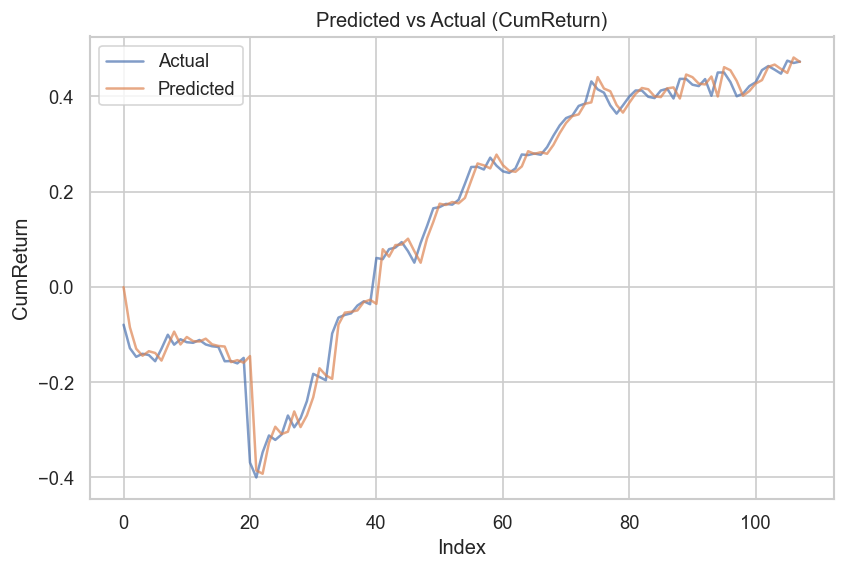

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y, label="Actual", alpha=0.7)
plt.plot(y_pred, label="Predicted", alpha=0.7)
plt.legend()
plt.title("Predicted vs Actual (CumReturn)")
plt.xlabel("Index")
plt.ylabel("CumReturn")
plt.show()


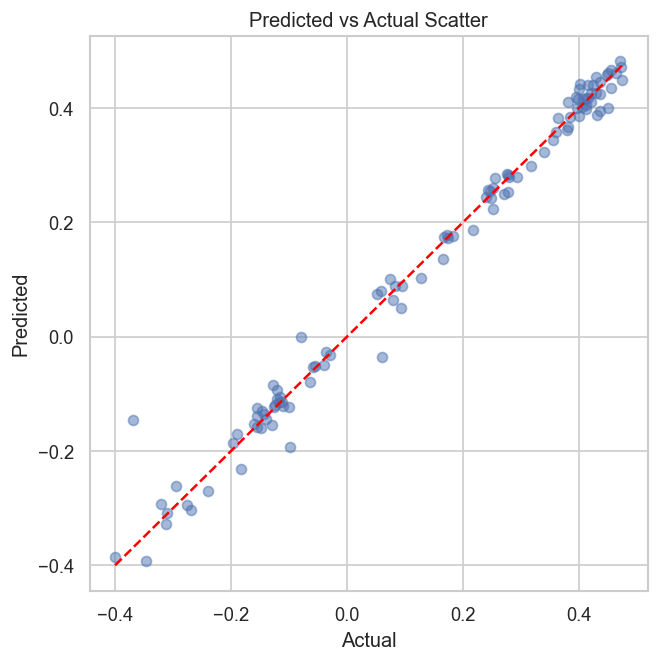

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual Scatter")
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.show()


eature Engineering: Created log returns, cumulative returns, and 5-day rolling volatility.

Model Performance: MAE and RMSE from the linear regression model indicate the prediction errors.

Limitations: Linear models struggle to capture the nonlinearity and volatility clustering in financial data.

Future Improvements: Consider using tree-based models (Random Forest, XGBoost) or time series models (ARIMA, LSTM).